In [1]:
#installing required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#loading the dataset
df = pd.read_csv('Reviews.csv')


In [9]:
# data preprocessing

#selecting only required columns
df = df[['Text', 'Score']]

#converting score into binary labels
#1,2-> Negative(0), 4,5->Positive(1), drop score=3(neutral)
df = df[df['Score'] != 3]
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [11]:
#checking the class balance
print('\nClass distribution:')
print(df['Sentiment'].value_counts())


Class distribution:
Sentiment
1    443777
0     82037
Name: count, dtype: int64


In [13]:
#Train-Test split
X = df['Text']              
y = df['Sentiment'] 

In [15]:
#splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 420651
Testing samples: 105163


In [17]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Fit on training text and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"\nTF-IDF feature matrix shape (Train): {X_train_tfidf.shape}")
print(f"TF-IDF feature matrix shape (Test): {X_test_tfidf.shape}")



TF-IDF feature matrix shape (Train): (420651, 10000)
TF-IDF feature matrix shape (Test): (105163, 10000)


In [19]:
#training Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
print("\nLogistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [21]:
#evaluating the model performance
y_prediction = lr.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.77     16407
           1       0.95      0.98      0.96     88756

    accuracy                           0.94    105163
   macro avg       0.90      0.84      0.87    105163
weighted avg       0.93      0.94      0.93    105163



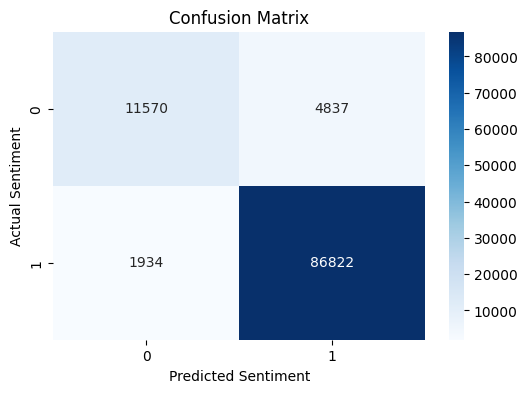

In [34]:
#confusion matrix plot
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Correct: calculate confusion matrix
cm = confusion_matrix(y_test, y_prediction)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#testing the model with custom input
def predict_sentiment(text):
    vec = tfidf.transform([text])
    result = lr.predict(vec)
    return "Positive " if result[0] == 1 else "Negative "

In [38]:
print("\nCustom Test Example 1:", predict_sentiment("This product is excellent and I love it!"))
print("Custom Test Example 2:", predict_sentiment("Worst experience ever. Totally disappointed."))


Custom Test Example 1: Positive 
Custom Test Example 2: Negative 
